reference:  
https://lp-tech.net/articles/0QUUd

In [65]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

## encoding

In [66]:
train= pd.read_csv("../data/input/train.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
test= pd.read_csv("../data/input/test.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)

In [67]:
display(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


## fillna Age, embarked

In [69]:
train["Age"].fillna(train.Age.mean(), inplace=True)
train["Embarked"].fillna(train.Embarked.mean(), inplace=True)

## treat Name
Mlle => Miss
MS => Miss
Mme => Mrs
others => Rare

In [70]:
train['Name'].value_counts().to_dict()

{'Abbing, Mr. Anthony': 1,
 'Blackwell, Mr. Stephen Weart': 1,
 'Silvey, Mrs. William Baird (Alice Munger)': 1,
 'Kantor, Mr. Sinai': 1,
 "O'Brien, Mr. Timothy": 1,
 'Svensson, Mr. Olof': 1,
 'Dean, Master. Bertram Vere': 1,
 'Olsson, Mr. Nils Johan Goransson': 1,
 'Niskanen, Mr. Juha': 1,
 'Vestrom, Miss. Hulda Amanda Adolfina': 1,
 'Gillespie, Mr. William Henry': 1,
 'Hawksford, Mr. Walter James': 1,
 'Carter, Rev. Ernest Courtenay': 1,
 'Honkanen, Miss. Eliina': 1,
 'Todoroff, Mr. Lalio': 1,
 'Shelley, Mrs. William (Imanita Parrish Hall)': 1,
 'Taussig, Mr. Emil': 1,
 'Williams-Lambert, Mr. Fletcher Fellows': 1,
 'Andersson, Mr. Anders Johan': 1,
 'Ross, Mr. John Hugo': 1,
 'Ringhini, Mr. Sante': 1,
 'West, Miss. Constance Mirium': 1,
 'Thomas, Master. Assad Alexander': 1,
 'Carlsson, Mr. Frans Olof': 1,
 'Cardeza, Mr. Thomas Drake Martinez': 1,
 'Bonnell, Miss. Elizabeth': 1,
 'Gaskell, Mr. Alfred': 1,
 'Hippach, Miss. Jean Gertrude': 1,
 'Crosby, Miss. Harriet R': 1,
 'Allison, Mi

In [71]:
combine1 = [train]

for train in combine1: 
        train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 
for train in combine1: 
        train['Salutation'] = train['Salutation'].\
        replace(
            ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
            'Rare'
        )
        train['Salutation'] = train['Salutation'].replace('Mlle', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Ms', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Mme', 'Mrs')
        del train['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
for train in combine1: 
        train['Salutation'] = train['Salutation'].map(Salutation_mapping) 
        train['Salutation'] = train['Salutation'].fillna(0)

## treat Ticket

In [72]:
train['Ticket'].value_counts(dropna=False).to_dict()

{'CA. 2343': 7,
 '1601': 7,
 '347082': 7,
 '347088': 6,
 '3101295': 6,
 'CA 2144': 6,
 '382652': 5,
 'S.O.C. 14879': 5,
 '17421': 4,
 '19950': 4,
 '2666': 4,
 'LINE': 4,
 '113760': 4,
 '4133': 4,
 '113781': 4,
 'PC 17757': 4,
 'W./C. 6608': 4,
 '349909': 4,
 '347077': 4,
 'C.A. 31921': 3,
 '110152': 3,
 'PC 17755': 3,
 'PC 17572': 3,
 'F.C.C. 13529': 3,
 'SC/Paris 2123': 3,
 '371110': 3,
 'C.A. 34651': 3,
 '230080': 3,
 '345773': 3,
 '239853': 3,
 '347742': 3,
 'PC 17760': 3,
 '13502': 3,
 '24160': 3,
 '248727': 3,
 'PC 17582': 3,
 '110413': 3,
 '29106': 3,
 '35273': 3,
 '363291': 3,
 '11668': 2,
 '113798': 2,
 '244252': 2,
 '17474': 2,
 '2699': 2,
 'C.A. 2315': 2,
 'STON/O2. 3101279': 2,
 'P/PP 3381': 2,
 '36928': 2,
 'PC 17611': 2,
 'A/5. 3336': 2,
 '28403': 2,
 '2668': 2,
 'W./C. 6607': 2,
 '113505': 2,
 '2691': 2,
 '239865': 2,
 '2651': 2,
 '370129': 2,
 '17453': 2,
 '237736': 2,
 '367230': 2,
 '19928': 2,
 '31027': 2,
 '111361': 2,
 'PC 17593': 2,
 '358585': 2,
 '11967': 2,
 '1274

In [73]:
for train in combine1:
    train['Ticket_Lett'] = train['Ticket'].apply(lambda x:str(x)[0])
    train['Ticket_Lett'] = train['Ticket_Lett'].apply(lambda x:str(x))
    train['Ticket_Lett'] = np.where(
        (train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']),
        train['Ticket_Lett'],
        np.where((train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0', '0')
    )
    train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))
    
del train['Ticket']

train['Ticket_Lett'] = train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3)

In [74]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Salutation,Ticket_Lett,Ticket_Len
0,1,0,3,0,22.000000,1,0,7.2500,NaN,0.0,1.0,3,9
1,2,1,1,1,38.000000,1,0,71.2833,C85,1.0,3.0,0,8
2,3,1,3,1,26.000000,0,0,7.9250,NaN,0.0,2.0,3,16
3,4,1,1,1,35.000000,1,0,53.1000,C123,0.0,3.0,1,6
4,5,0,3,0,35.000000,0,0,8.0500,NaN,0.0,1.0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,NaN,0.0,5.0,2,6
887,888,1,1,1,19.000000,0,0,30.0000,B42,0.0,2.0,1,6
888,889,0,3,1,29.699118,1,2,23.4500,NaN,0.0,2.0,0,10
889,890,1,1,0,26.000000,0,0,30.0000,C148,1.0,1.0,1,6


## treat Cabin

In [64]:
train['Cabin'].value_counts().to_dict()

{'G6': 4,
 'C23 C25 C27': 4,
 'B96 B98': 4,
 'D': 3,
 'C22 C26': 3,
 'F33': 3,
 'F2': 3,
 'E101': 3,
 'E24': 2,
 'C92': 2,
 'C52': 2,
 'B5': 2,
 'E25': 2,
 'C125': 2,
 'B35': 2,
 'B18': 2,
 'C126': 2,
 'D26': 2,
 'B49': 2,
 'C65': 2,
 'C2': 2,
 'E8': 2,
 'D17': 2,
 'D20': 2,
 'E44': 2,
 'D33': 2,
 'B77': 2,
 'B57 B59 B63 B66': 2,
 'E67': 2,
 'C123': 2,
 'C93': 2,
 'E121': 2,
 'C78': 2,
 'B51 B53 B55': 2,
 'D35': 2,
 'C68': 2,
 'B58 B60': 2,
 'D36': 2,
 'B22': 2,
 'B20': 2,
 'F4': 2,
 'B28': 2,
 'C124': 2,
 'C83': 2,
 'E33': 2,
 'F G73': 2,
 'C82': 1,
 'E38': 1,
 'C104': 1,
 'B39': 1,
 'B82 B84': 1,
 'E49': 1,
 'D56': 1,
 'D21': 1,
 'D48': 1,
 'E36': 1,
 'A23': 1,
 'C110': 1,
 'C106': 1,
 'C148': 1,
 'C54': 1,
 'C101': 1,
 'B71': 1,
 'D28': 1,
 'A34': 1,
 'A7': 1,
 'D46': 1,
 'C7': 1,
 'E46': 1,
 'C90': 1,
 'C32': 1,
 'E12': 1,
 'B38': 1,
 'B3': 1,
 'E58': 1,
 'B80': 1,
 'B94': 1,
 'D11': 1,
 'A32': 1,
 'C111': 1,
 'C45': 1,
 'A5': 1,
 'D7': 1,
 'E40': 1,
 'A10': 1,
 'C128': 1,
 'C86': 

In [75]:
for train in combine1:
    train['Cabin_Lett'] = train['Cabin'].apply(lambda x: str(x)[0])
    train['Cabin_Lett'] = train['Cabin_Lett'].apply(lambda x:str(x))
    train['Cabin_Lett'] = 
    np.where((train['Cabin_Lett']).\
             isin([ 'F', 'E', 'D', 'C', 'B', 'A']), 
             train['Cabin_Lett'],
             np.where((train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), 
                      '0','0')
            )
del train['Cabin'] 
train['Cabin_Lett'] = train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

In [76]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,1,0,3,0,22.000000,1,0,7.2500,0.0,1.0,3,9,0
1,2,1,1,1,38.000000,1,0,71.2833,1.0,3.0,0,8,1
2,3,1,3,1,26.000000,0,0,7.9250,0.0,2.0,3,16,0
3,4,1,1,1,35.000000,1,0,53.1000,0.0,3.0,1,6,1
4,5,0,3,0,35.000000,0,0,8.0500,0.0,1.0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0.0,5.0,2,6,0
887,888,1,1,1,19.000000,0,0,30.0000,0.0,2.0,1,6,2
888,889,0,3,1,29.699118,1,2,23.4500,0.0,2.0,0,10,0
889,890,1,1,0,26.000000,0,0,30.0000,1.0,1.0,1,6,1


## Family

In [77]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
for train in combine1:
    train['IsAlone'] = 0
    train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

In [78]:
train_data = train.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

## treat test data

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [81]:
test["Age"].fillna(train.Age.mean(), inplace=True)
test["Fare"].fillna(train.Fare.mean(), inplace=True)

combine = [test]
for test in combine:
    test['Salutation'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for test in combine:
    test['Salutation'] = test['Salutation'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    test['Salutation'] = test['Salutation'].replace('Mlle', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Ms', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Mme', 'Mrs')
    del test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for test in combine:
    test['Salutation'] = test['Salutation'].map(Salutation_mapping)
    test['Salutation'] = test['Salutation'].fillna(0)

for test in combine:
        test['Ticket_Lett'] = test['Ticket'].apply(lambda x: str(x)[0])
        test['Ticket_Lett'] = test['Ticket_Lett'].apply(lambda x: str(x))
        test['Ticket_Lett'] = np.where((test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), test['Ticket_Lett'],
                                   np.where((test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
        del test['Ticket']
test['Ticket_Lett']=test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

for test in combine:
        test['Cabin_Lett'] = test['Cabin'].apply(lambda x: str(x)[0])
        test['Cabin_Lett'] = test['Cabin_Lett'].apply(lambda x: str(x))
        test['Cabin_Lett'] = np.where((test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),test['Cabin_Lett'],
                                   np.where((test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del test['Cabin']
test['Cabin_Lett']=test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 

test["FamilySize"] = train["SibSp"] + train["Parch"] + 1

for test in combine:
    test['IsAlone'] = 0
    test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
    
test_data = test.values
xs_test = test_data[:, 1:]

## create model

In [82]:
random_forest = RandomForestClassifier()
random_forest.fit(xs, y)
Y_pred = random_forest.predict(xs_test)

In [89]:
import csv
with open("../data/output/predict_result_data_2020-10-26-21-22.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassngerId", "Survived"])
    for pid, survived in zip(test_data[:, 0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])

In [95]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import grid_search
from sklearn.model_selection import GridSearchCV

parameters = {
        'n_estimators'      : [10,25,50,75,100],
        'random_state'      : [0],
        'n_jobs'            : [4],
        'min_samples_split' : [5,10, 15, 20,25, 30],
        'max_depth'         : [5, 10, 15,20,25,30]
}

clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(xs, y)
 
print(clf.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=75,
                       n_jobs=4, random_state=0)


## Data Analysis

D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
findfont: Font family ['TakaoPGothic'] not found. Falling back to DejaVu Sans.


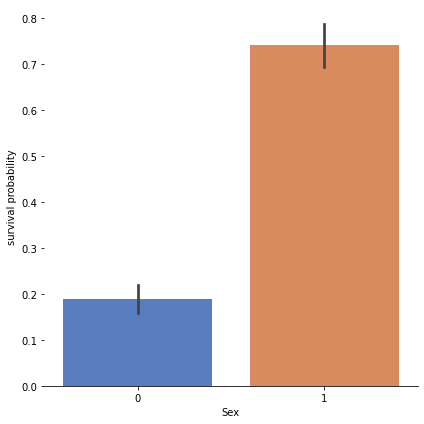

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.factorplot(x="Sex", y="Survived", data=train, size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

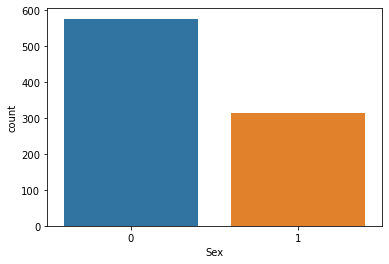

In [97]:
sns.countplot(x="Sex", data=train)

D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


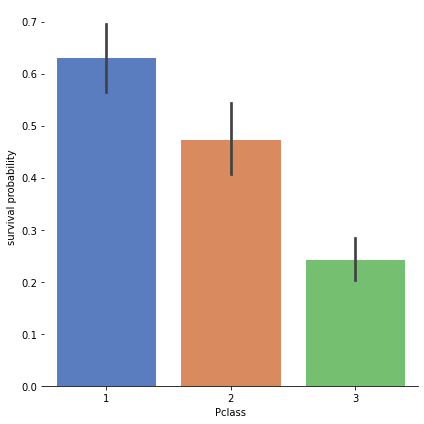

In [98]:
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


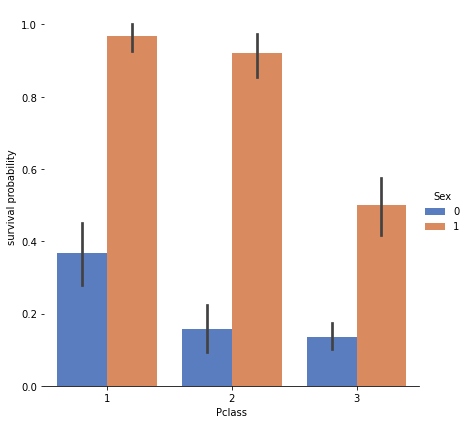

In [99]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


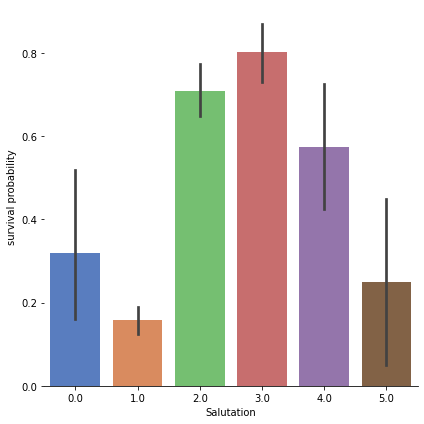

In [100]:
g = sns.factorplot(x="Salutation", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

findfont: Font family ['TakaoPGothic'] not found. Falling back to DejaVu Sans.


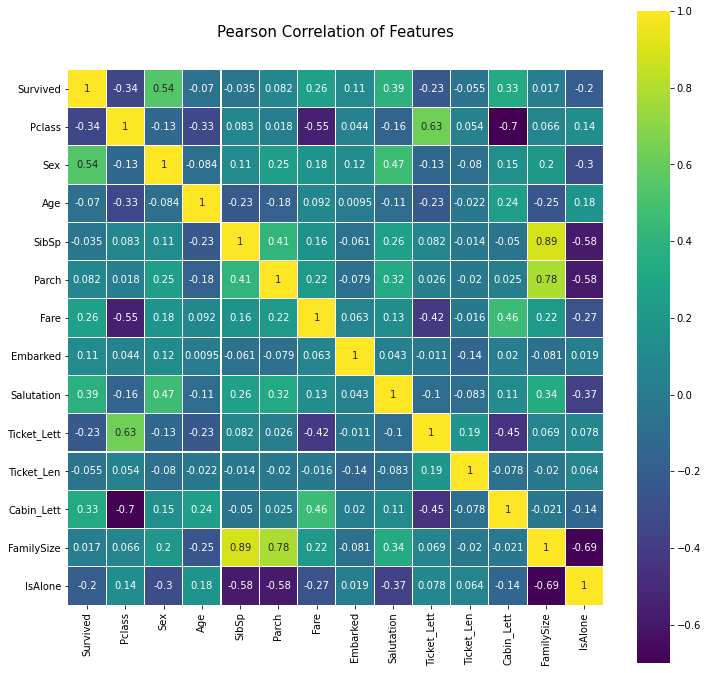

In [101]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
del train['PassengerId']
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

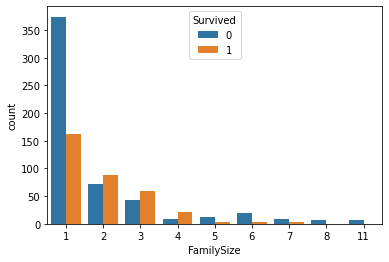

In [102]:
sns.countplot(x='FamilySize', data = train, hue = 'Survived')

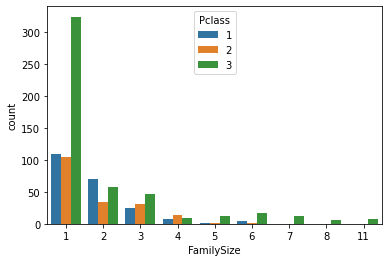

In [105]:
sns.countplot(x='FamilySize', data = train,hue = 'Pclass')

D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


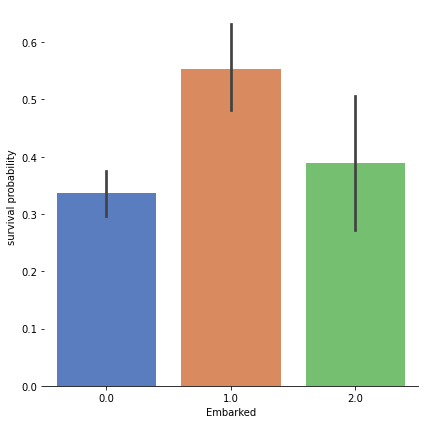

In [107]:
t=pd.read_csv("../data/input/train.csv").replace("S",0).replace("C",1).replace("Q",2)
train['Embarked']= t['Embarked']
g = sns.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

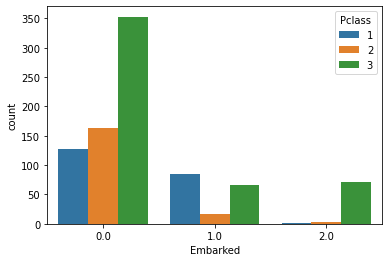

In [108]:
sns.countplot(x='Embarked', data = train,hue = 'Pclass')

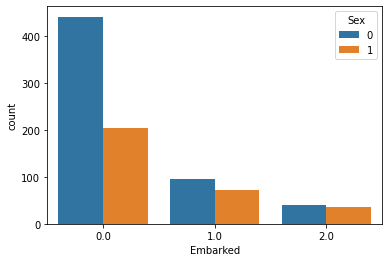

In [109]:
sns.countplot(x='Embarked', data = train,hue = 'Sex')

<Figure size 432x288 with 0 Axes>

findfont: Font family ['TakaoPGothic'] not found. Falling back to DejaVu Sans.


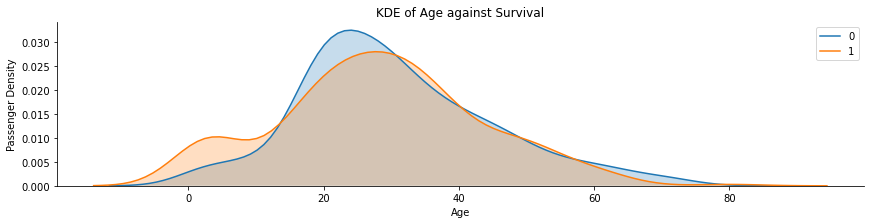

In [110]:
plt.figure()
sns.FacetGrid(data=t, hue="Survived", aspect=4).map(sns.kdeplot, "Age", shade=True)
plt.ylabel('Passenger Density')
plt.title('KDE of Age against Survival')
plt.legend()

D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\app-data\miniconda-dir\envs\ml\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


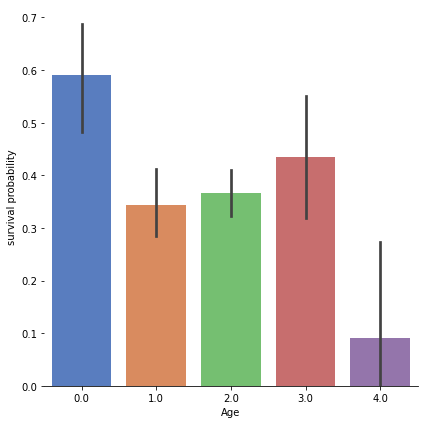

In [111]:
for t in combine1: 
    t.loc[ t['Age'] <= 15, 'Age']                                                = 0
    t.loc[(t['Age'] > 15) & (t['Age'] <= 25), 'Age'] = 1
    t.loc[(t['Age'] > 25) & (t['Age'] <= 48), 'Age'] = 2
    t.loc[(t['Age'] > 48) & (t['Age'] <= 64), 'Age'] = 3
    t.loc[ t['Age'] > 64, 'Age'] =4
g = sns.factorplot(x="Age", y="Survived",  data=t,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

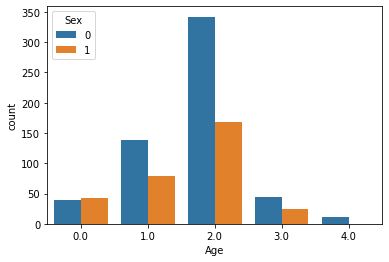

In [112]:
sns.countplot(x='Age', data = t,hue = 'Sex')

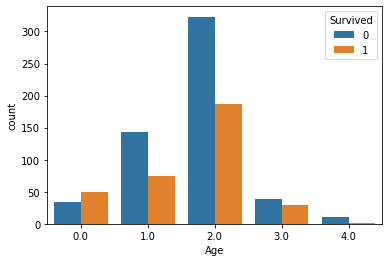

In [113]:
sns.countplot(x='Age', data = t,hue = 'Survived')